# logistic regression

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

from sklearn import tree
import pydotplus
from IPython.display import Image
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

## data preprocess

### read train.csv, preprocess

In [2]:
# load data & show head
df = pd.read_csv('../cs5228/train.csv')
print(df.shape)
df.head()

(24421, 14)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,exceeds50K
0,30,?,147215,Some-college,10,Never-married,?,Own-child,Female,0,0,30,United-States,0
1,60,Private,173960,Bachelors,13,Divorced,Prof-specialty,Not-in-family,Female,0,0,42,United-States,0
2,52,?,105428,Some-college,10,Married-civ-spouse,?,Husband,Male,0,0,12,United-States,0
3,37,Private,112497,Bachelors,13,Married-civ-spouse,Sales,Husband,Male,0,0,60,United-States,0
4,63,Private,137843,Some-college,10,Married-civ-spouse,Sales,Husband,Male,7298,0,48,United-States,1


In [3]:
# split features and labels
X = df.drop(['exceeds50K'],axis=1)
Y = df['exceeds50K']
X.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country
0,30,?,147215,Some-college,10,Never-married,?,Own-child,Female,0,0,30,United-States
1,60,Private,173960,Bachelors,13,Divorced,Prof-specialty,Not-in-family,Female,0,0,42,United-States
2,52,?,105428,Some-college,10,Married-civ-spouse,?,Husband,Male,0,0,12,United-States


### read test.csv, preprocess

In [4]:
df_test = pd.read_csv('../cs5228/test.csv')
print(df_test.shape)
X_test = df_test
df_test.head(3)

(24421, 13)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country
0,23,Private,32732,Some-college,10,Married-civ-spouse,Sales,Husband,Male,0,0,25,United-States
1,69,Private,165017,HS-grad,9,Widowed,Machine-op-inspct,Unmarried,Male,2538,0,40,United-States
2,27,Private,36440,Bachelors,13,Never-married,Sales,Not-in-family,Female,0,0,40,United-States


In [5]:
# replace missing value ' ?' by mode

feature_list = X.columns

# count missing value ' ?' 
print('missing value count in train.scv')
for feature in feature_list:
    print(feature, ' ', len(X[X[feature] == ' ?']))

print('\nmissing value count in test.csv')
for feature in feature_list:
    print(feature, ' ', len(X_test[X_test[feature]==' ?']))

# replace
X_all = pd.concat([X,X_test], axis = 0)
imputer = SimpleImputer(missing_values=' ?', strategy='most_frequent')
imputer.fit(X_all)
X = pd.DataFrame(imputer.transform(X), columns = feature_list)
X_test = pd.DataFrame(imputer.transform(X_test), columns = feature_list)
X.head(3)

missing value count in train.scv
age   0
workclass   1392
fnlwgt   0
education   0
education-num   0
marital-status   0
occupation   1399
relationship   0
sex   0
capital-gain   0
capital-loss   0
hours-per-week   0
native-country   410

missing value count in test.csv
age   0
workclass   1407
fnlwgt   0
education   0
education-num   0
marital-status   0
occupation   1410
relationship   0
sex   0
capital-gain   0
capital-loss   0
hours-per-week   0
native-country   447


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country
0,30,Private,147215,Some-college,10,Never-married,Prof-specialty,Own-child,Female,0,0,30,United-States
1,60,Private,173960,Bachelors,13,Divorced,Prof-specialty,Not-in-family,Female,0,0,42,United-States
2,52,Private,105428,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,Male,0,0,12,United-States


In [6]:
# marital-status into single, married
print(set(X['marital-status'].values))
single_list = [' Separated', ' Divorced', ' Widowed', ' Never-married']
married_list = [' Married-AF-spouse', ' Married-spouse-absent', ' Married-civ-spouse']

X['marital-status'][X['marital-status'].isin(married_list)] = 'married'
X['marital-status'][X['marital-status'].isin(single_list)] = 'single'
X_test['marital-status'][X_test['marital-status'].isin(married_list)] = 'married'
X_test['marital-status'][X_test['marital-status'].isin(single_list)] = 'single'
X.head()

{' Never-married', ' Married-AF-spouse', ' Married-civ-spouse', ' Widowed', ' Married-spouse-absent', ' Divorced', ' Separated'}


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country
0,30,Private,147215,Some-college,10,single,Prof-specialty,Own-child,Female,0,0,30,United-States
1,60,Private,173960,Bachelors,13,single,Prof-specialty,Not-in-family,Female,0,0,42,United-States
2,52,Private,105428,Some-college,10,married,Prof-specialty,Husband,Male,0,0,12,United-States
3,37,Private,112497,Bachelors,13,married,Sales,Husband,Male,0,0,60,United-States
4,63,Private,137843,Some-college,10,married,Sales,Husband,Male,7298,0,48,United-States


### embedding, train&test data together

In [7]:
# transfer string feature into int

# features in string to be encoded
encoding_features = ['workclass','education','marital-status','occupation','relationship','sex','native-country']

# to include all possible values
X_all = pd.concat([X,X_test], axis = 0)
for feature in encoding_features:
    encoder = preprocessing.LabelEncoder()
    encoder.fit(X_all[feature])
    X[feature] = encoder.transform(X[feature])
    X_test[feature] = encoder.transform(X_test[feature])

X.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country
0,30,3,147215,15,10,1,9,3,0,0,0,30,38
1,60,3,173960,9,13,1,9,1,0,0,0,42,38
2,52,3,105428,15,10,0,9,0,1,0,0,12,38


In [8]:
# feature scaling

scaler = preprocessing.StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns = feature_list)
X_test = pd.DataFrame(scaler.transform(X_test), columns = feature_list)
X.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country
0,-0.627855,-0.086978,-0.397416,1.218346,-0.037490,0.946594,0.714447,0.965669,-1.421717,-0.145954,-0.216863,-0.849954,0.263597
1,1.565644,-0.086978,-0.141947,-0.335686,1.127814,0.946594,0.714447,-0.279387,-1.421717,-0.145954,-0.216863,0.120349,0.263597
2,0.980711,-0.086978,-0.796568,1.218346,-0.037490,-1.056419,0.714447,-0.901915,0.703375,-0.145954,-0.216863,-2.305408,0.263597


In [9]:
X_train ,X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.3, random_state = 0)

## logistic regression training

In [12]:
clf1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.5, max_iter= 500)
clf2 = LogisticRegression(penalty='l2', solver='liblinear', C=0.5, max_iter= 500)
clf1.fit(X_train, Y_train)
clf2.fit(X_train, Y_train)
print('theta1', clf1.coef_, (clf1.coef_ !=0).sum(axis=1))
print('theta2', clf2.coef_, (clf2.coef_ !=0).sum(axis=1))
Y_pred1 = clf1.predict(X_val)
Y_pred2 = clf2.predict(X_val)
print('\nl1',accuracy_score(Y_val,Y_pred1),'\n',classification_report(Y_val,Y_pred1))
print('\nl2',accuracy_score(Y_val,Y_pred2),'\n',classification_report(Y_val,Y_pred2))

theta1 [[ 0.37730894 -0.14039528  0.08394261  0.07310955  0.90799066 -1.24938399
  -0.04860196  0.14379715  0.25290665  2.555123    0.28771277  0.37930199
   0.06200059]] [13]
theta2 [[ 0.3789061  -0.14117955  0.08489923  0.07444918  0.90764984 -1.2471556
  -0.04961935  0.148358    0.25815006  2.52229427  0.2877746   0.3800744
   0.0630553 ]] [13]

l1 0.845639415859151 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      5573
           1       0.73      0.57      0.64      1754

    accuracy                           0.85      7327
   macro avg       0.80      0.75      0.77      7327
weighted avg       0.84      0.85      0.84      7327


l2 0.845775897365907 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      5573
           1       0.73      0.57      0.64      1754

    accuracy                           0.85      7327
   macro avg       0.80      0.75      0.77      7327
wei

### adjusting and improving hyperparameters

#### iterations


l1 max 0.8425126462375747 11

l2 max 0.8426764128769861 11


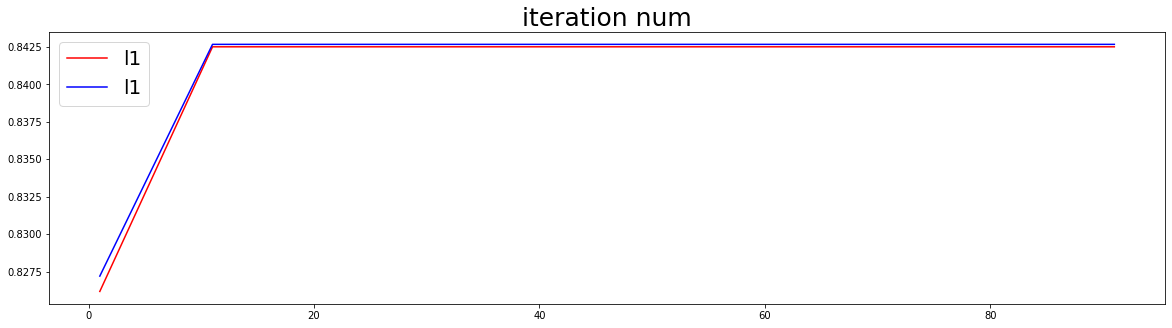

In [18]:
score_list1 = []
score_list2 = []

for i in range(1, 100, 10):
    clf1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.5, max_iter= i)
    clf2 = LogisticRegression(penalty='l2', solver='liblinear', C=0.5, max_iter= i)
    score1 = cross_val_score(clf1, X, Y, cv=10).mean()
    score_list1.append(score1)
    score2 = cross_val_score(clf2, X, Y, cv=10).mean()
    score_list2.append(score2)

print('\nl1 max',max(score_list1), score_list1.index(max(score_list1))*10+1)
print('\nl2 max',max(score_list2), score_list2.index(max(score_list2))*10+1)

plt.figure(figsize=[20,5])
plt.plot(range(1, 100, 10), score_list1, c='r', label ='l1')
plt.plot(range(1, 100, 10), score_list2, c='b', label ='l2')
plt.title("iteration num", fontsize=25)
plt.legend(fontsize=20)
plt.show()
# iteration 20 is enough


l1 max 0.8418743418743418 c 0.05

l2 max 0.840938340938341 c 0.8500000000000001


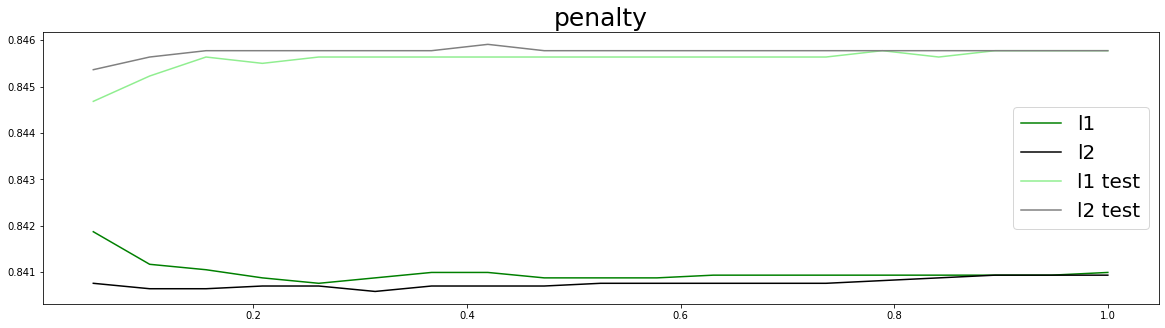

In [28]:
# n_estimator, fine tuning
score_list1 = []
test_list1 = []
score_list2 = []
test_list2 = []

for i in np.linspace(0.05,1,19):
    clf1 = LogisticRegression(penalty='l1', solver='liblinear', C=i, max_iter= 25)
    clf2 = LogisticRegression(penalty='l2', solver='liblinear', C=i, max_iter= 25)
    clf1.fit(X_train,Y_train)
    clf2.fit(X_train,Y_train)
    score1 = accuracy_score(clf1.predict(X_train), Y_train)
    score_list1.append(score1)
    test1 = accuracy_score(clf1.predict(X_val), Y_val)
    test_list1.append(test1)
    score2 = accuracy_score(clf2.predict(X_train), Y_train)
    score_list2.append(score2)
    test2 = accuracy_score(clf2.predict(X_val), Y_val)
    test_list2.append(test2)
    
print('\nl1 max',max(score_list1), 'c',score_list1.index(max(score_list1))*0.05+0.05)
print('\nl2 max',max(score_list2), 'c', score_list2.index(max(score_list2))*0.05+0.05)

list_c = list(np.linspace(0.05,1,19))
plt.figure(figsize=[20,5])
plt.plot(list_c, score_list1, c='green', label ='l1')
plt.plot(list_c, score_list2, c='black', label ='l2')
plt.plot(list_c, test_list1, c='lightgreen', label ='l1 test')
plt.plot(list_c, test_list2, c='gray', label ='l2 test')
plt.title("penalty", fontsize=25)
plt.legend(fontsize=20)
plt.show()


## predict test data

In [ ]:
Y_test = clf.predict(X_test)
print(Y_test.shape)

### wirte predictions into file

In [ ]:
# wirte into file
df_res = pd.read_csv('../cs5228/sample_submission.csv')
df_res['prediction'] = Y_test
print(df_res.head())
df_res.to_csv('../submissions/logistic_submission.csv', index = False)